# Problem Set 2.1 - Arctic ice maps

**Total points:** 30

**Due:** Friday February 17 7pm CET

**Format:** IPython Notebook or python program

## Part 1 - examining a single map (6 points)

(550, 500)


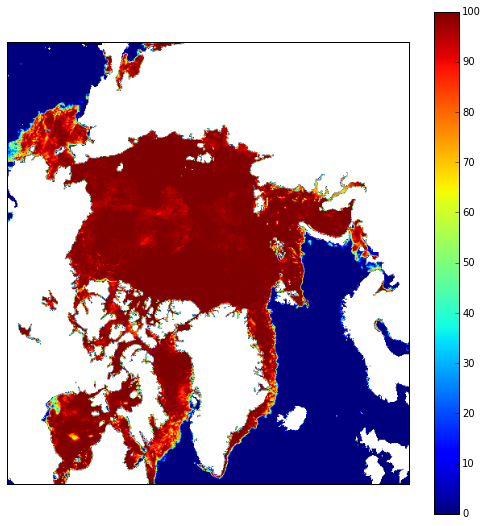

In [5]:
import os
from os.path import basename
from matplotlib.ticker import ScalarFormatter
datadir=os.environ['PYCOURSEDATA']
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

datadir = './'


data2=np.load(datadir+'ice_data/20080415.npy')#data2 is ice data of 20080415
data3=np.load(datadir+'ice_data_area.npy')#data3 is ice area
plt.figure(figsize=(9,9))#set size of picture
plt.imshow(data2, origin='lower',cmap=plt.cm.jet)#show image
plt.colorbar()#plot colorbar
plt.xticks([], [])#get rid of ticks
plt.yticks([], [])
print(np.shape(data2))

## Part 2 - reading in multiple maps (10 points)

the number of pixels with a concentration above 50% against time is:


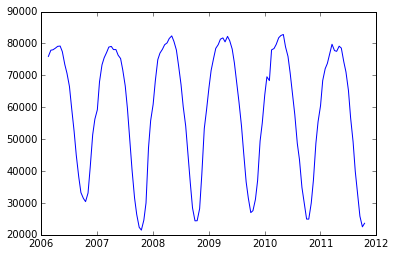

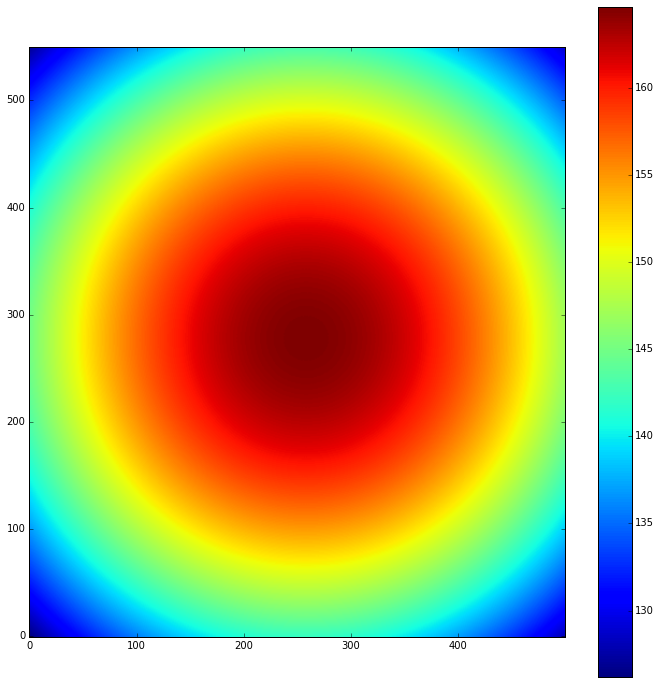

In [6]:
l=glob.glob(datadir+'ice_data/*.npy')#get the file list
l.sort()
n=[]#number of ice concentration >50,list of m
a=[]#area of ice concentration >99, list of b
time=[]#list of time
#loop in the ice files
for i in l: 
    m=0#number of ice concentration >50
    b=0#area of ice concentration >99
    data=np.load(i)
    name=basename(i)#get the name of file 
    year=int(name[0:4])
    month=int(name[4:6])
    day=int(name[6:8])
    time.append(year+month/12+day/360)#get the time variable
    data = np.nan_to_num(data)#get rid of 'nan'
    m = np.size(data[data>50])
    b=sum(data3[data>99])
    n.append(m)#number of ice concentration >50,list of m
    a.append(b)#total area of ice concentration >99, list of b

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
print('the number of pixels with a concentration above 50% against time is:')
plt.plot(time,n)#the number of pixels with a concentration above 50% against time
#although the ice concertration is period during the year,
#but the minimum ice concertration of each year seems to slowly goes down

#pixel area is changing over the image
plt.figure(figsize=(12,12))
plt.imshow(data3, origin='lower',cmap=plt.cm.jet)
plt.colorbar()


# HLudwig: the calculation of the time is not correct. You should subtract 1 from the 
# months anddays. Moreover, your plots lack axis labels!

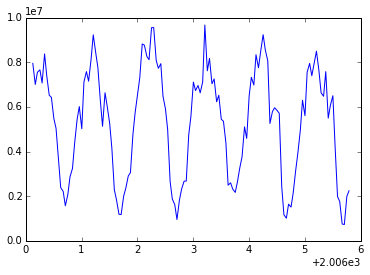

In [7]:
#the area of >99% ice concentration against time
plt.plot(time,a)
#the minimum is becoming smaller and smaller

## Part 3 - visualizing changes over time (10 points)

The date at which the area of the region 
 where the ice concentration is above 99% is the smallest is: 
 2011 8 15
The minimum area is: 729407.398148


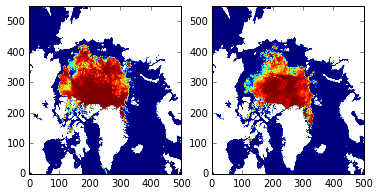

In [10]:
minimum=min(a)#find the minimum area of ice concentration>99%
min_time=time[a.index(minimum)]#find the time of minimum area of ice concentration>99%
min_year=int(min_time//1)
min_month=int((min_time-min_year)*12//1)
min_day=int(((min_time-min_year)*12%1)*30)#get the time as year,month,and day
print('The date at which the area of the region','\n','where the ice concentration is above 99% is the smallest is:','\n',min_year,min_month,min_day)
print('The minimum area is:', minimum)
data_2006=np.load(datadir+'ice_data/20060815.npy')#get the ice data of 20060815
data_2011=np.load(datadir+'ice_data/20110815.npy')#get the ice data of 20110815
plt.figure(figsize=(9,9))
f,axarr=plt.subplots(1,2)#plot side-by-side pictures of two days
axarr[0].imshow(data_2006, origin='lower',cmap=plt.cm.jet)
axarr[1].imshow(data_2011, origin='lower',cmap=plt.cm.jet)

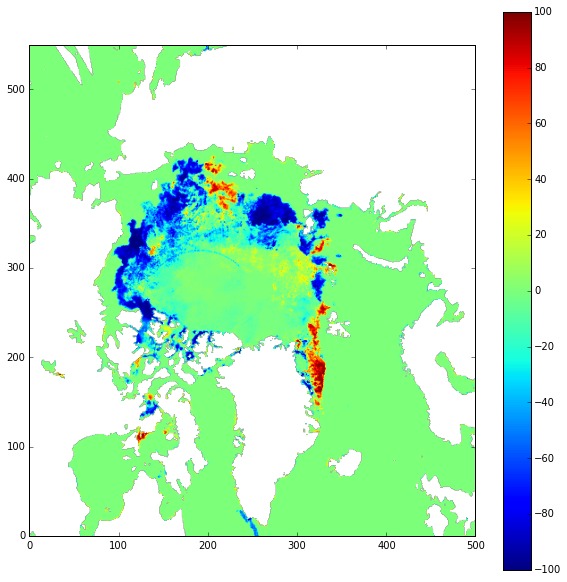

In [9]:
data_diff=data_2011-data_2006#difference between the two maps 
plt.figure(figsize=(10,10))
plt.imshow(data_diff,origin='lower')
plt.colorbar()

## Part 4 - yearly averages (4 points)

** HLudwig: except for small glitches everything you worked on is correct. I do not know how much help you had. Howeverm I see big progress in view of the problems you had during the coarse! **